In [87]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import cv2
import os
import glob


final_arr=[]


In [88]:

# Read the input image


def detect_face(img):
  # Convert into grayscale
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Load the cascade
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
  face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  # Draw rectangle around the faces and crop the faces
  for (x, y, w, h) in faces:
    cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = gray[y:y + h, x:x + w]
    
  # Display the output
  # plt.imshow(faces)
  # cv2.waitKey()
  return faces




In [89]:

def prepare_training_data(folder):
  detected_faces = []
  face_labels = []
  total_pics = 0
  temparr=[]
  training_large_dirs = os.listdir(folder)
  finalarr=[]
  for dir_name in training_large_dirs:

    

    training_image_path = folder+"/"+dir_name

    training_images_names = os.listdir(training_image_path)

    for image_name in training_images_names:
      if(total_pics == 591):
        break
      total_pics+=1
      image_path = training_image_path + "/" + image_name
      

      image = cv2.imread(image_path) 

      
      face = detect_face(image)
      if(len(face) == 0):
        continue

      
      
      resized_face = cv2.resize(face, (200, 200))
      
      
      
      cv2.imwrite(("./cropped_faces/%s-%d.jpg" % (dir_name,total_pics)),resized_face)
      face_labels.append(dir_name)
      
      
      detected_faces.append(resized_face)
    
    finalarr.append(list([dir_name, temparr]))
  
  return detected_faces, face_labels, finalarr


In [90]:
def plot_portraits(images, titles, h, w, n_row, n_col):
    """ function to plot a gallery of portraits"""
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap="gray")
        #plt.title(titles[i], color="black")
        plt.xticks(())
        plt.yticks(())

In [91]:

detected_faces, face_labels ,finalarr= prepare_training_data("images")
detected_faces=np.array(detected_faces)
print(detected_faces.shape,face_labels)



(342, 200, 200) ['bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'bhuvneshwar_kumar', 'dinesh_karthik', 'dinesh_karthik', 'dinesh_karthik', 'dinesh_karthik', 'dinesh_karthik', 'dinesh_karthik', 'dinesh_karthik', 'dinesh_karthik', 'dinesh_karthik', 'dinesh_karthik', 'dinesh_karthik', 'dinesh_karthik', 'dinesh_karthik', 'hardik_pandya', 'hardik_pandya', 'hardik_pandya', 'hardik_pandya', 'hardik_pandya', 'hardik_pandya', 'hardik_pandya', 'hardik_pandya', 'hardik_pandya', 'hardik_pandya', 'hardik_pandya', 'hardik_pandya',

In [92]:
label=[]

face_labels=np.array(face_labels)




In [93]:
# plt.figure(figsize=(2.2 * 10, 2.2 * 10))
# plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
# u=0
# for i in range(100):
#     plt.subplot(10, 10, i + 1)
#     plt.imshow(detected_faces[u].reshape((200, 200)), cmap="gray")
#     #plt.title(titles[i], color="black")
#     plt.xticks(())
#     plt.yticks(())
#     u=u+5

In [94]:
n_samples_train, h, w = detected_faces.shape



detected_faces=detected_faces.reshape(detected_faces.shape[0],200*200)


print(detected_faces)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [95]:

meanArr = np.mean(detected_faces, axis = 0)
print(meanArr)
print(meanArr.shape)
normalizedArr = detected_faces - meanArr
print(normalizedArr)
print(normalizedArr.shape)

[ 0.30116959  0.3128655   0.3245614  ... 10.38596491 10.25730994
  5.77192982]
(40000,)
[[ -0.30116959  -0.3128655   -0.3245614  ... -10.38596491 -10.25730994
   -5.77192982]
 [ -0.30116959  -0.3128655   -0.3245614  ... -10.38596491 -10.25730994
   -5.77192982]
 [ -0.30116959  -0.3128655   -0.3245614  ... -10.38596491 -10.25730994
   -5.77192982]
 ...
 [ -0.30116959  -0.3128655   -0.3245614  ... -10.38596491 -10.25730994
   -5.77192982]
 [ -0.30116959  -0.3128655   -0.3245614  ... -10.38596491 -10.25730994
   -5.77192982]
 [ -0.30116959  -0.3128655   -0.3245614  ... -10.38596491 -10.25730994
   -5.77192982]]
(342, 40000)


In [96]:
from numpy import linalg as LA

n_components = 5
covarianceMatrix = np.cov(normalizedArr)
eigenValues, eigenVectors = LA.eig(covarianceMatrix)

print(eigenValues.shape,eigenVectors.shape)









(342,) (342, 342)


In [116]:
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
print(eigenValues.shape)
eigenVectors =eigenVectors[:,idx]
print(eigenVectors.shape)
print(eigenValues[:10])
print(eigenValues[:n_components])
print(eigenValues[-n_components:-1])
eig_vectors = (eigenVectors[:n_components]).real
print(eig_vectors)
eig_faces = eig_vectors.dot(normalizedArr).real
print(eig_vectors.shape, eig_faces.shape)

(342,)
(342, 342)
[120008.74953631 100832.39693231  51413.92537196  42867.28756763
  39293.84742816  30437.23619868  24979.05365029  20209.61432124
  16566.37959687  13845.31426398]
[120008.74953631 100832.39693231  51413.92537196  42867.28756763
  39293.84742816]
[42.64520938 40.29633804 36.75396821 36.32199922]
[[ 0.03883988  0.04927731  0.08602259 ...  0.02040996 -0.02858263
   0.05407381]
 [ 0.03835582 -0.00424801 -0.08768825 ...  0.0183554   0.00197547
   0.05407381]
 [-0.01205626 -0.02582595 -0.0308318  ...  0.14327465  0.35096875
   0.05407381]
 [ 0.00426543 -0.03097951  0.03779889 ... -0.01341061  0.02875162
   0.05407381]
 [ 0.05437632  0.02527038 -0.03632434 ... -0.04167419 -0.0258181
   0.05407381]]
(5, 342) (5, 40000)


['EIGEN FACE: 1', 'EIGEN FACE: 2', 'EIGEN FACE: 3', 'EIGEN FACE: 4', 'EIGEN FACE: 5']


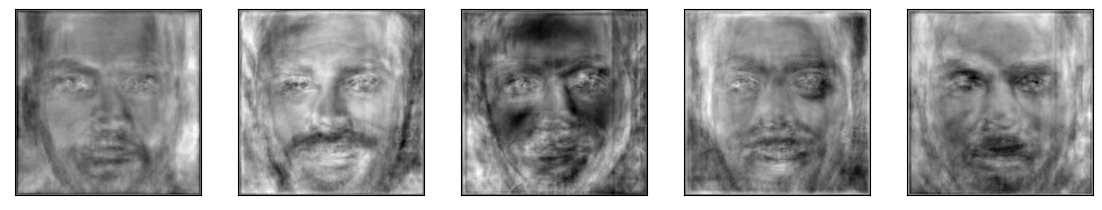

In [98]:
labels=[]
count=1
for face in eig_faces:
    face=np.add(face,meanArr)
    face=np.reshape(face,(200,200))
    labels.append("EIGEN FACE: %d" %count)
    count+=1
print(labels)
plot_portraits(eig_faces,labels,200,200,1,5)


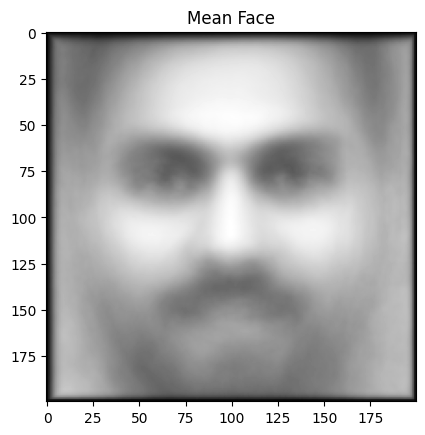

In [99]:



mean_face=meanArr.reshape(200,200)
plt.imshow(mean_face,cmap='gray')
plt.title("Mean Face")
plt.show()

In [100]:
reduced_data = eig_faces.dot(normalizedArr.T).real
print(reduced_data)
print(reduced_data.shape)
print(face_labels.shape)
training_data= pd.DataFrame(reduced_data.T)
training_data['label'] = face_labels
x=training_data.drop('label',axis=1)
y=training_data['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(y_test,y_train)

[[ 3.13250523e+07 -1.46706048e+04  2.01620793e+06 ...  6.65841196e+06
  -9.87111454e+06 -9.55609451e+06]
 [-4.92674997e+06 -2.33909566e+07 -2.39377314e+07 ... -3.92916861e+07
   1.00674143e+07  5.60882725e+06]
 [-1.46731708e+07  5.99601612e+06  1.21479782e+07 ...  4.44692786e+07
   3.73044788e+07  4.17196711e+07]
 [-9.94253882e+05 -3.13347986e+07 -1.61694976e+07 ... -6.69851949e+06
  -2.70194780e+06  8.31104951e+06]
 [ 1.42878734e+07 -3.21596593e+07 -4.42010068e+07 ... -4.53821708e+07
   9.55275382e+06  1.38573040e+07]]
(5, 342)
(342,)
237         rohit_sharma
116         kedar_jadhav
113         kedar_jadhav
42         hardik_pandya
126        kuldeep_yadav
             ...        
79           k._l._rahul
193      ravindra_jadeja
18     bhuvneshwar_kumar
140        kuldeep_yadav
265       shikhar_dhawan
Name: label, Length: 103, dtype: object 31      dinesh_karthik
244       rohit_sharma
228       rohit_sharma
175           ms_dhoni
249       rohit_sharma
            ...       
188  

(5, 342) (5, 40000) (40000,)


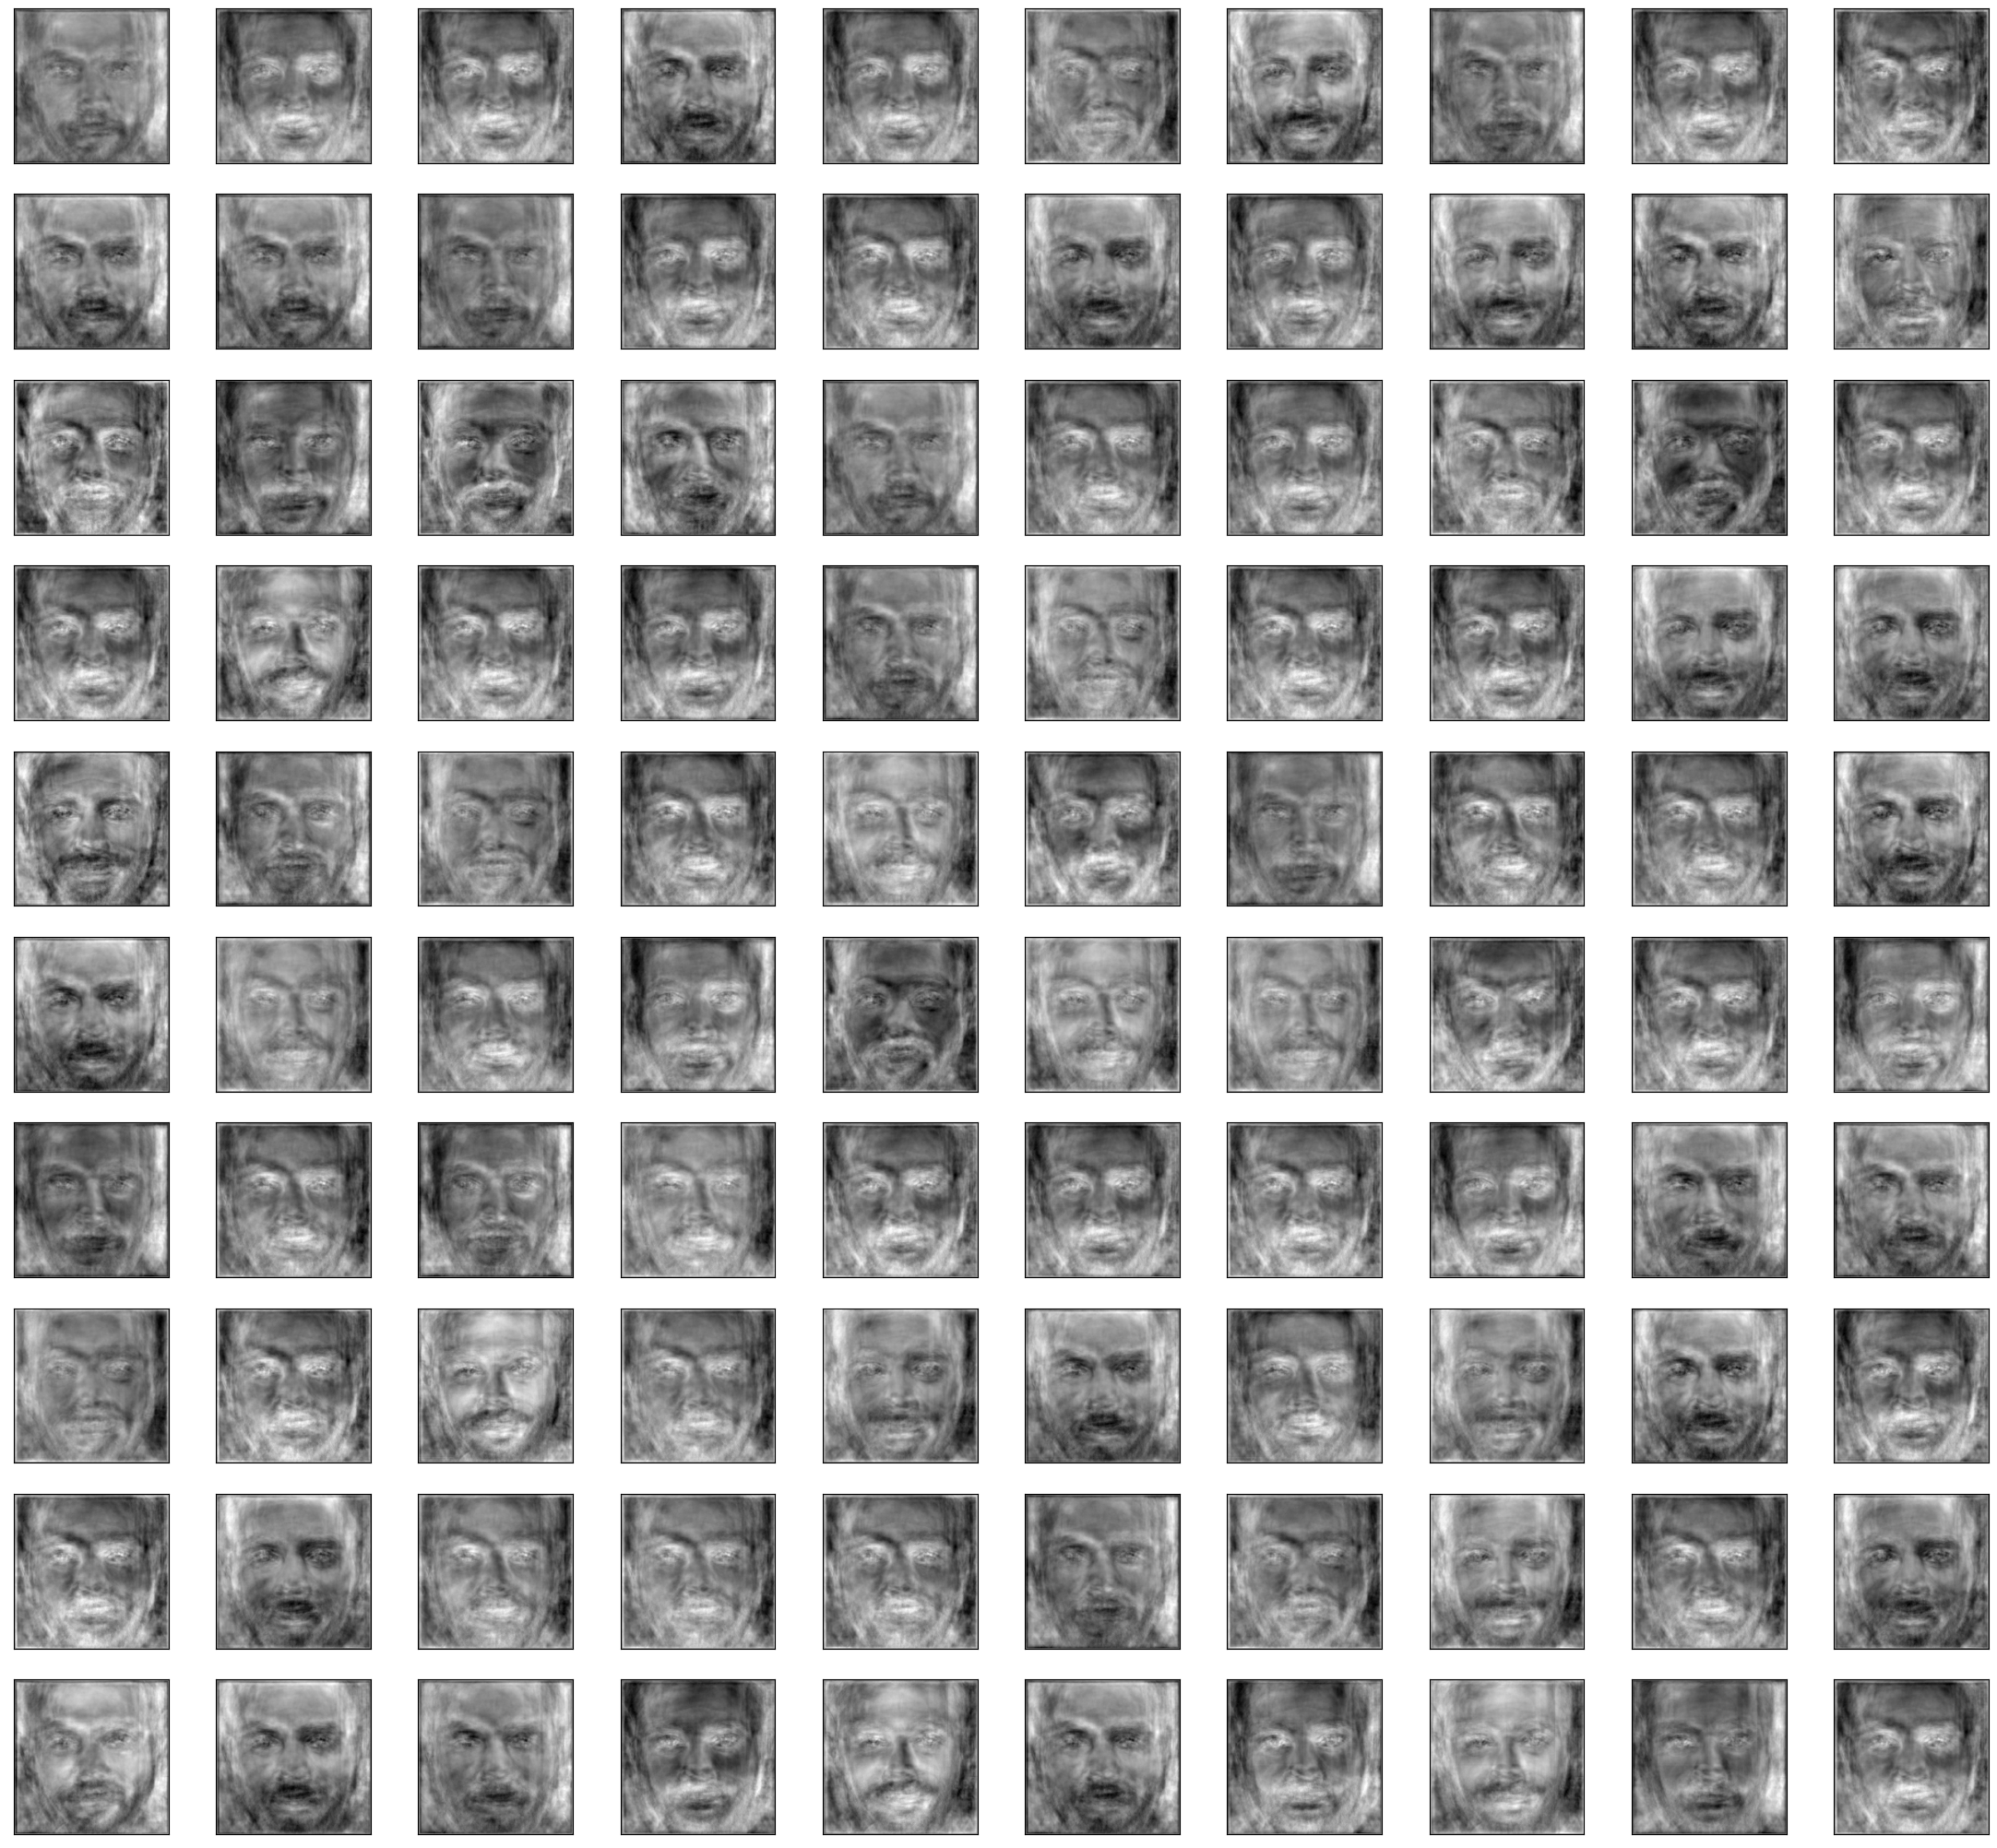

In [115]:
print(reduced_data.shape, eig_faces.shape, meanArr.shape)

eig_faces_inverse = reduced_data.T.dot(eig_faces) + meanArr.T
plot_portraits(eig_faces_inverse,y_train, h, w, 10, 10)

In [102]:
# eig_faces_inverse_test = pca.inverse_transform(reduced_test_data)
# plot_portraits(eig_faces_inverse_test, labels_test, h, w, 3, 10)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score using inbuilt 1-NN: {score}")



x_test.shape

Accuracy score using inbuilt 1-NN: 0.20388349514563106


(103, 5)

In [104]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_test, y_test)
acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
print(acc_random_forest)

17.48


In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print(f"Accuracy score using LDA: {score}")

Accuracy score using LDA: 0.14563106796116504


In [106]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_test, y_test) * 100, 2)
print(acc_sgd)

4.85


In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [108]:
pca_inbuilt_faces=pd.DataFrame(detected_faces)

pca_inbuilt_faces['label']=face_labels
print(pca_inbuilt_faces)

x_inbuilt=pca_inbuilt_faces.drop('label',axis=1)
y_inbuilt=pca_inbuilt_faces['label']

x_train_inbuilt, x_test_inbuilt, y_train_inbuilt, y_test_inbuilt= train_test_split(x_inbuilt, y_inbuilt, test_size=0.3, random_state=42)

     0  1  2  3  4  5  6  7  8  9  ...  39991  39992  39993  39994  39995  \
0    0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
1    0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
2    0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
3    0  0  0  0  0  0  0  0  0  0  ...     19     19     19     19     19   
4    0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
..  .. .. .. .. .. .. .. .. .. ..  ...    ...    ...    ...    ...    ...   
337  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
338  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
339  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
340  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
341  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   

     39996  39997  39998  39999              label  
0        0      0     

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
x_train_inbuilt = sc.fit_transform(x_train_inbuilt)
x_test_inbuilt = sc.transform(x_test_inbuilt)

In [110]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 5)
  
x_train_inbuilt = pca.fit_transform(x_train_inbuilt)
x_test_inbuilt = pca.transform(x_test_inbuilt)
  
explained_variance = pca.explained_variance_ratio_

clf_i = KNeighborsClassifier(n_neighbors=1)
clf_i.fit(x_train_inbuilt, y_train)
y_pred_inbuilt = clf_i.predict(x_test_inbuilt)
score = accuracy_score(y_test, y_pred_inbuilt)
print(f"Accuracy score using 1-NN: {score}")







Accuracy score using 1-NN: 0.2912621359223301


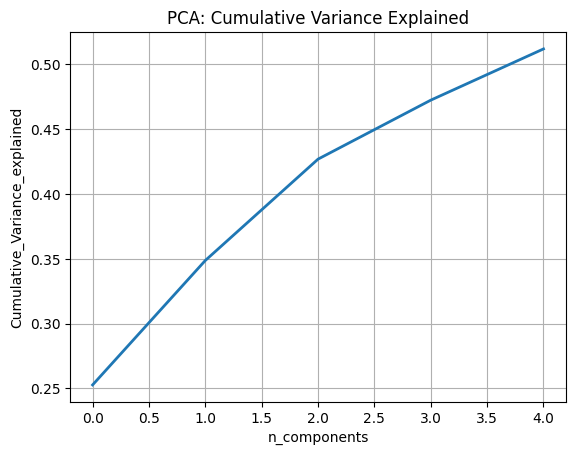

In [111]:
cum_var_explained=np.cumsum(explained_variance)
fig, axes = plt.subplots(1, 2)
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.title("PCA: Cumulative Variance Explained")
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()
